In [8]:
from collections import defaultdict
from aocutils.visuals import visualize_graph
import networkx as nx

In [9]:
f = open("in.txt").read().split("\n")
lines = [line for line in f]
G = nx.Graph()
conn = defaultdict(set)
for line in lines:
    x,y = line.split('-')
    conn[x].add(y)
    conn[y].add(x)
    G.add_edge(*line.split('-'))

In [10]:
nodes = sorted(conn.keys())
nodeidx = {node: idx for idx, node in enumerate(nodes)}
res = set()
for idx, x in enumerate(nodes):
    for idx2, y in enumerate(nodes[idx + 1 :], start=idx + 1):
        for z in nodes[idx2 + 1 :]:
            if y in conn[x] and z in conn[x] and z in conn[y]:
                if x[0] == "t" or y[0] == "t" or z[0] == "t":
                    res.add(tuple(sorted((x, y, z))))
len(res)

1314

In [11]:
options = [[node] for node in nodes]
for step in range(2,100):
    newoptions = []
    for option in options:
        for node in nodes[nodeidx[option[-1]]:]: # only search the computers that come alphabetically later than the last added computer
            if all(node in conn[node1] for node1 in option): # and check if they are connected to all in the option
                newoptions.append(option + [node])
    options = newoptions
    print(f'{step} computers, has {len(options)} options')
    if len(options) == 1:
        print(','.join(options[0])) # it's already sorted! :)
        break        

2 computers, has 3380 options
3 computers, has 11011 options
4 computers, has 26455 options
5 computers, has 45045 options
6 computers, has 55770 options
7 computers, has 50622 options
8 computers, has 33462 options
9 computers, has 15730 options
10 computers, has 5005 options
11 computers, has 975 options
12 computers, has 91 options
13 computers, has 1 options
bg,bu,ce,ga,hw,jw,nf,nt,ox,tj,uu,vk,wp


In [12]:
# or with networkx
ans = 0
for c in nx.enumerate_all_cliques(G):
    if len(c) == 3 and any(comp.startswith('t') for comp in c):
        ans += 1
maxclique = sorted(nx.find_cliques(G), key=len)[-1]
ans, ','.join(sorted(maxclique))

(1314, 'bg,bu,ce,ga,hw,jw,nf,nt,ox,tj,uu,vk,wp')

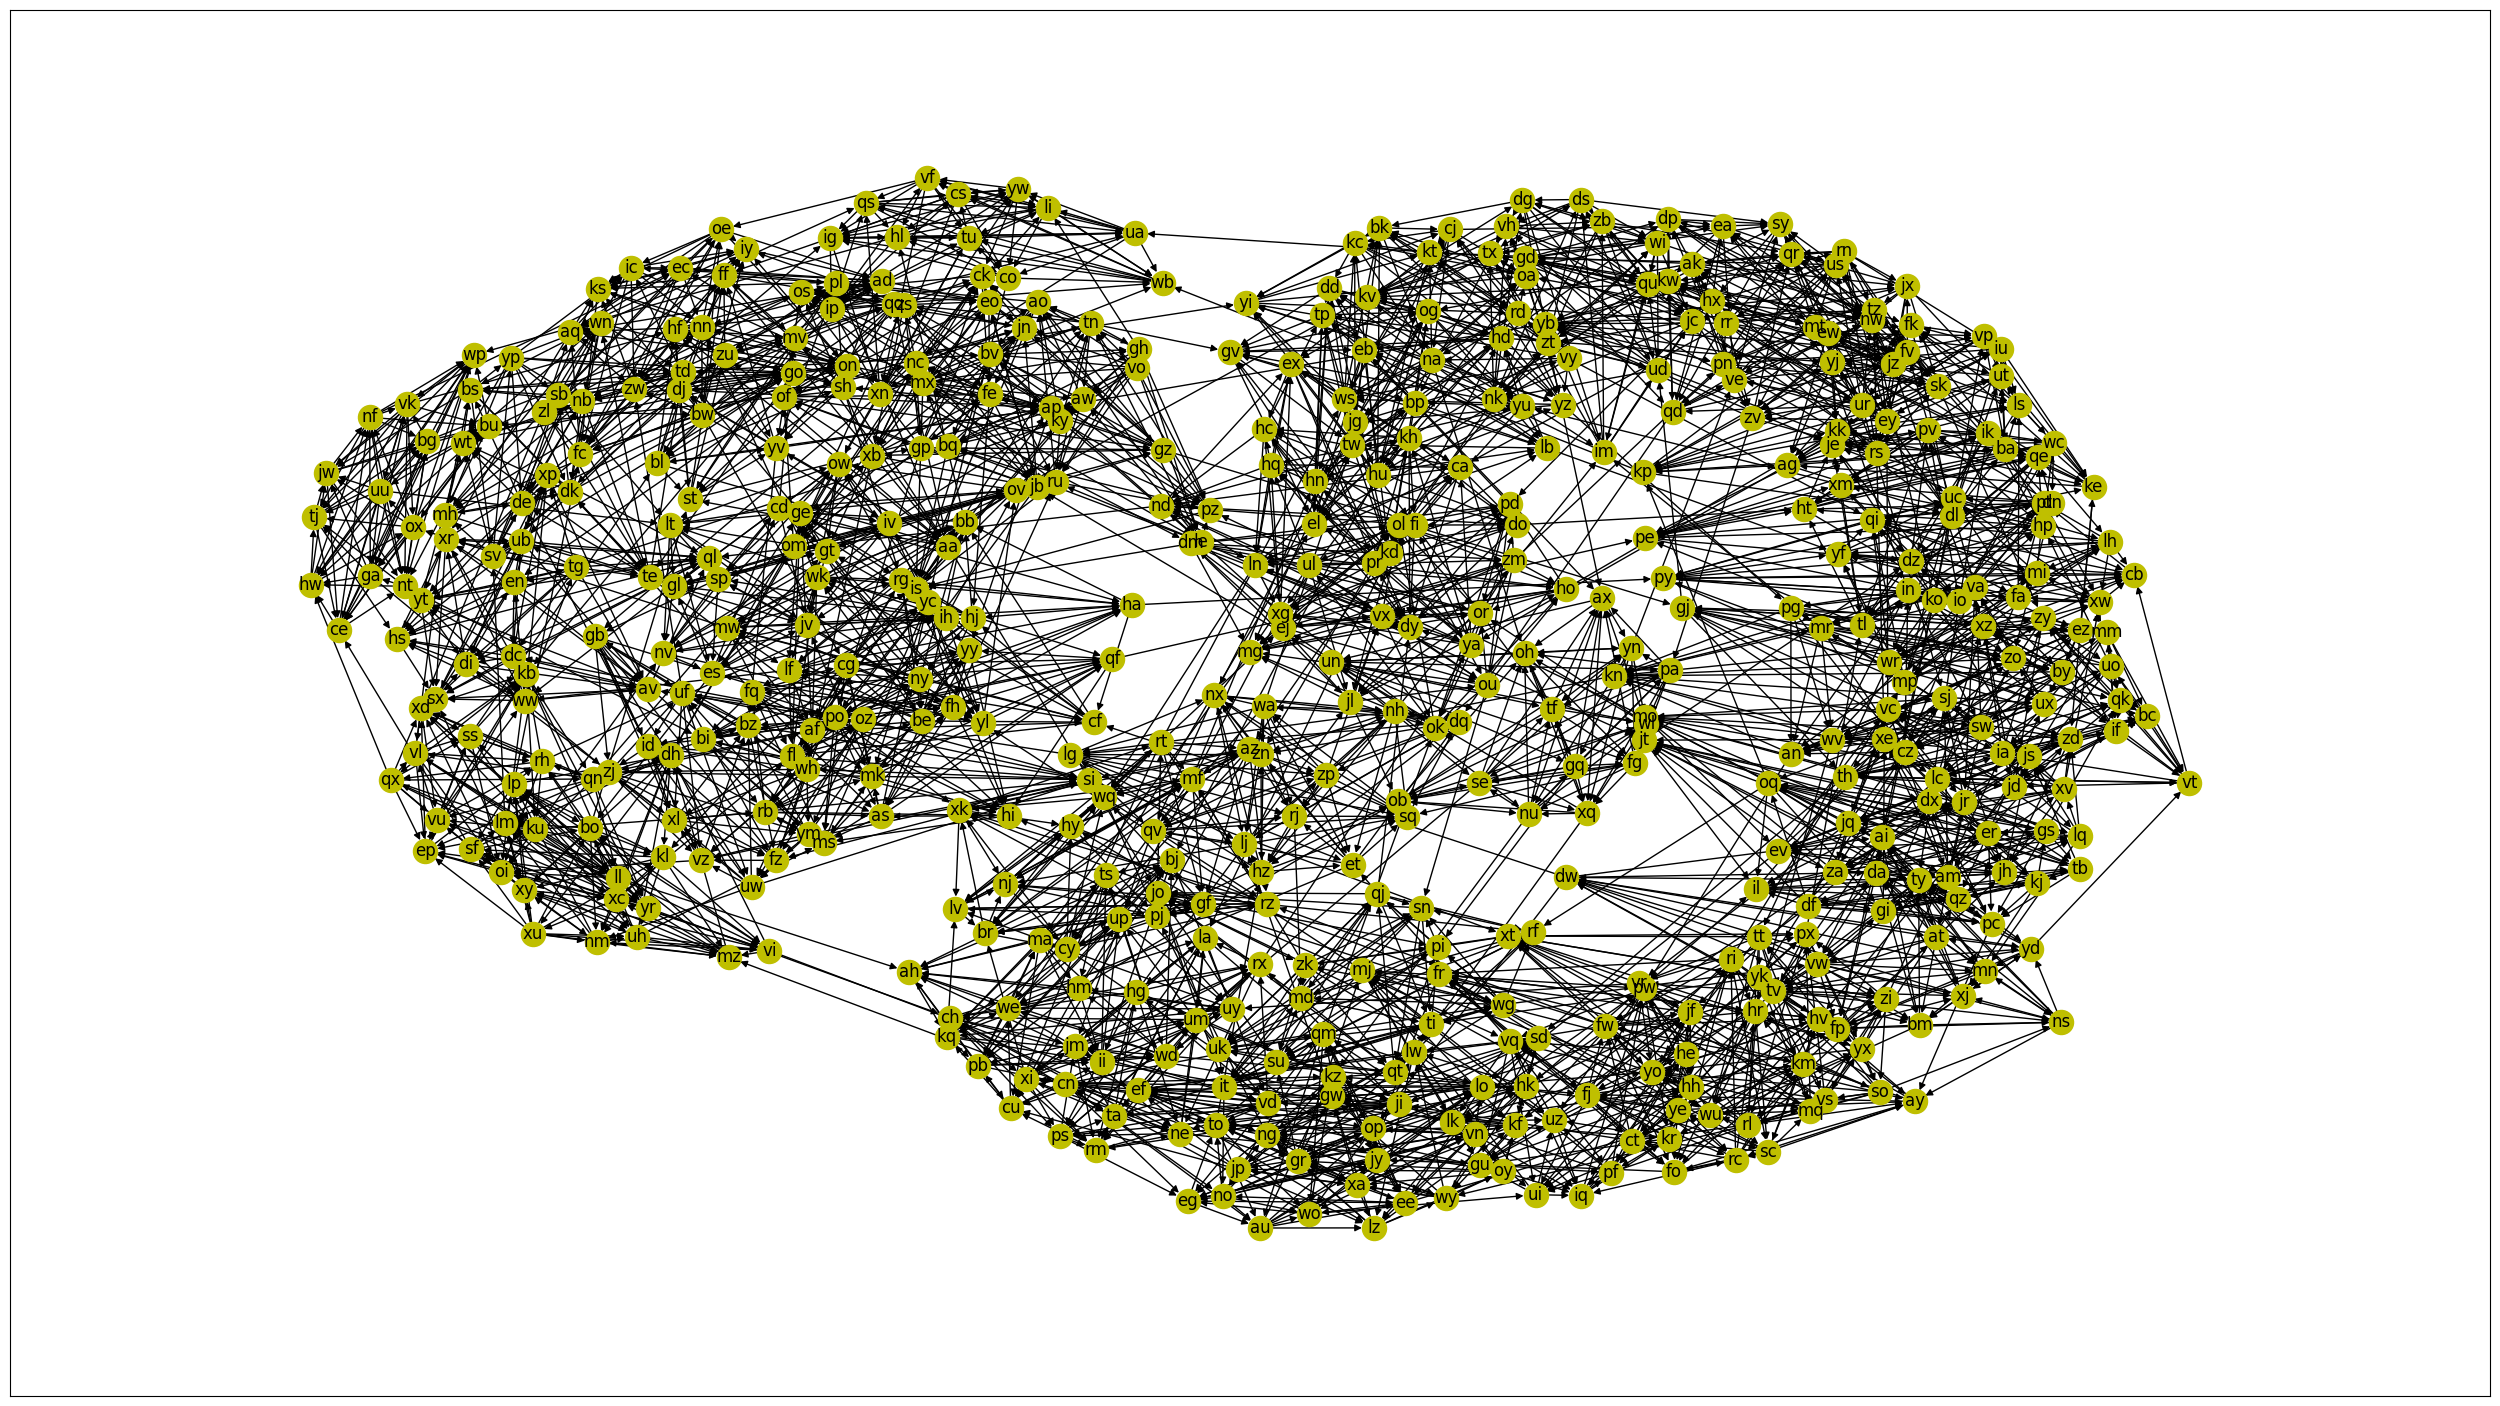

In [13]:
# this is how it looks like
visualize_graph({tuple(line.split('-')) for line in lines})